# Introduction

This dataset gives a number of variables along with a target condition of having or not having heart disease. This dataset contain 12 attributes. The "goal" field refers to the presence of heart disease in the patient. The goal is to predict the patient having heart disease or not.

## Loading Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,f1_score,auc,precision_recall_curve,average_precision_score
from sklearn.svm import SVC
import warnings
%matplotlib inline

## Cause of Heart Disease

1.  Excess weight, especially around the stomach area, increases a woman's risk of developing cardiovascular disease and lack of physical activity makes it worse.
2. Diabetes causes damage to blood vessels so diabetes is a major factor in developing cardiovascular disease.
3. Unhealthy foods, lack of exercise, lead to heart disease. So can high blood pressure, infections, and birth defects.
4. Smoking is one of the biggest causes of cardiovascular disease.
5. Just a few cigarettes a day can damage the blood vessels and reduce the amount of oxygen available in our blood.
*  But other things might surprise you.

### Loading the Data

In [2]:
data=pd.read_csv('heart.csv')
data.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## Explordatory Data Analysis (EDA)

### Data Description

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1.age: The person's age in years

2.sex: The person's sex (M = male, F = female)

3.ChestPainType: The chest pain experienced(TA :typical angina, ATA: atypical angina, NAP: non-anginal pain, ASY: asymptomatic)

4.RestingBP: The person's resting blood pressure 

5.Cholesterol: The person's cholesterol

6.FastingBS: The person's fasting blood sugar (1 = true; 0 = false)

7.RestingECG: Resting electrocardiographic measurement (normal, having ST-T wave abnormality, left ventricular hypertrophy)

8.MaxHR: The person's maximum heart rate achieved

9.ExerciseAngina: Exercise induced angina (Y = yes; N = no)

10.oldpeak: ST depression induced by exercise relative to rest

11.ST_slope: the slope of the peak exercise ST segment (UP, flat, downsloping)

12.Heart disease: (0 = no, 1 = yes)


### Dataset Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We have different data types attributes in the dataset, six columns having int64 datatype i.e.(Age, RestingBP, Cholesterol, FastingBS, MaxHR, HeartDisease) one columns having float64 i.e.(Oldpeak) and five columns having object datatype i.e. (Sex, ChestPainType,RestingECG, ExerciseAngina, ST_Slope)

### Describe Dataset

In [4]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.
As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation.

### Shape of Dataset

In [5]:
data.shape

(918, 12)

We have 918 rows and 12 columns in this dataset

### Pandas Profiling

Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. ... In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable.

In [6]:
import pandas_profiling
pf=pandas_profiling.ProfileReport(data)
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Here I use Pandas profiling, it reduce lots of our work.
Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.

### Checking Null Values

Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.

In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

there are no missing data in this dataset

In [8]:
data.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

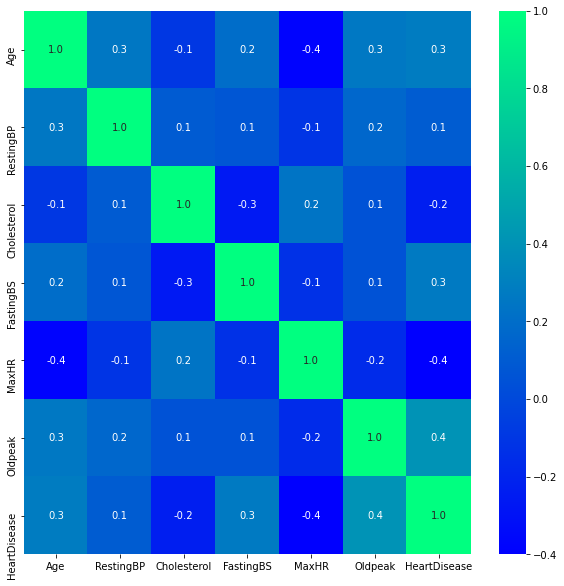

In [9]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f',cmap='winter')
plt.show()

In [10]:
data_corr=data.corr()['HeartDisease'][:-1]
feature_list=data_corr[abs(data_corr)>0.1].sort_values(ascending=False)
feature_list

Oldpeak        0.403951
Age            0.282039
FastingBS      0.267291
RestingBP      0.107589
Cholesterol   -0.232741
MaxHR         -0.400421
Name: HeartDisease, dtype: float64

## Data Visulization

### TARGET

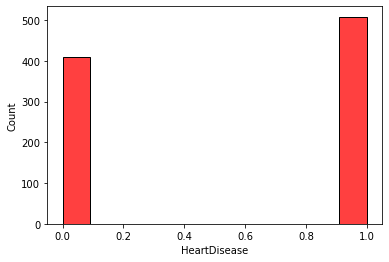

In [11]:
sns.histplot(data['HeartDisease'],color='Red', label='Heart Disease')
plt.show()

In [12]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "HeartDisease"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

from the above plot we see that 44.7% people does not have disease and 55.3% have heart disease.

### SEX

In [13]:
data['Sex'] = data.Sex.map({'M': 1, 'F':0})

In [14]:
data['Sex'] = data['Sex'].astype('int64')

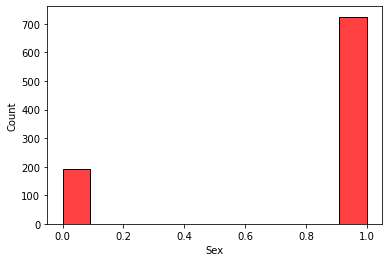

In [15]:
sns.histplot(data['Sex'], color= 'Red')
plt.show()

In [16]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Sex"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Male(1), Female(0)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In the heart disease dataset only 21% are female and rest are male. we have find that either male or female which have likely to heart disease.

ChestPainType RestingECG ExerciseAngina ST_Slope
0           ATA     Normal              N       Up
1           NAP     Normal              N     Flat
2           ATA         ST              N       Up
3           ASY     Normal              Y     Flat
4           NAP     Normal              N       Up

ChestPainType :> No of Unique Values :  ['ATA' 'NAP' 'ASY' 'TA'] 

RestingECG :> No of Unique Values :  ['Normal' 'ST' 'LVH'] 

ExerciseAngina :> No of Unique Values :  ['N' 'Y'] 

ST_Slope :> No of Unique Values :  ['Up' 'Flat' 'Down'] 



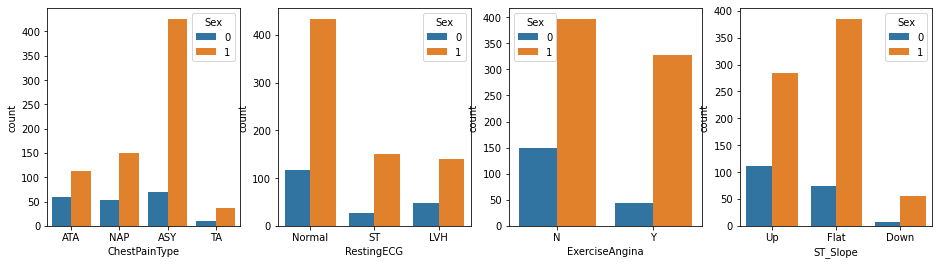

In [17]:
cat_feat = data.select_dtypes(include='object')
display(cat_feat.head())
for i in cat_feat:
    print(i,':> No of Unique Values : ', data[i].unique(),'\n')
plt.figure(figsize=(20,4))
j=1
for i in cat_feat:
    plt.subplot(1,5,j)
    sns.countplot(x= data[i], data= data,hue='Sex')
    j=j+1
plt.show()

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  HeartDisease
0   40    1        140          289          0    172             0
1   49    0        160          180          0    156             1
2   37    1        130          283          0     98             0
3   48    0        138          214          0    108             1
4   54    1        150          195          0    122             0


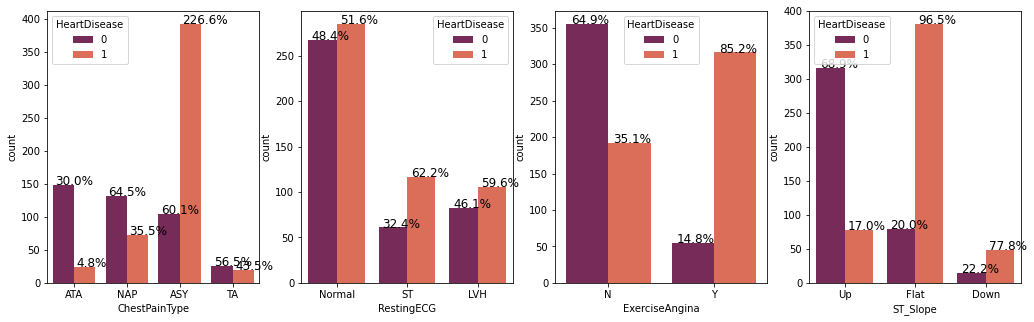

In [18]:
n_feat = data.select_dtypes(include='int64')
print(n_feat.head())

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    #plt.show()


plt.figure(figsize=(22,5))
j=1
for i in cat_feat:
    plt.subplot(1,5,j)
    ax= sns.countplot(x= data[i], data= data,hue='HeartDisease', palette='rocket' )
    n= data[i].nunique()
    with_hue(ax,data[i],n,2)
    j=j+1
plt.show()


##### from the above plot we see that the rate of heart disease in females have more in comprission of male. 

### Men are 4 times more likely to die from heart disease

* Cardiovascular disease is the leading cause of death in women in Australia with 90% of women having one risk factor. 
* The causes including high blood pressure, high cholesterol, smoking, diabetes, weight and family history are discussed.
* A man's risk also goes up if he's had a miscarriage or had his ovaries.
*  Men's hearts are affected by stress and depression more than women's. Depression makes it difficult to maintain a healthy lifestyle.

### CHEST PAIN

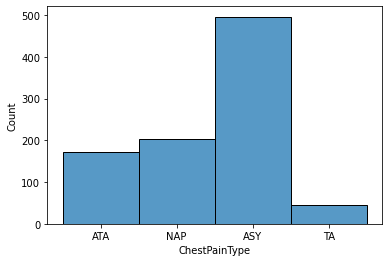

In [19]:
sns.histplot(data['ChestPainType'])
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In the above plot we see that 27.2% persons having chaist pain type 0, 82% having chaist pain type 1, 79.3% having chaist pain type 2 and 69.5% having chaist pain type 3. These person have heart disease, from this data we observe that those who have chaist pain type 1 and chaist pain type 2 is more likely to affected by heart disease.

The person having the heart rate over 140 is more likely to have heart disease, therefor we conclude that we have to check our heart rate monthly if its over the thalach 140 then we have to concult the doctor and much concious to the health.

### FASTING BLOOD SUGAR

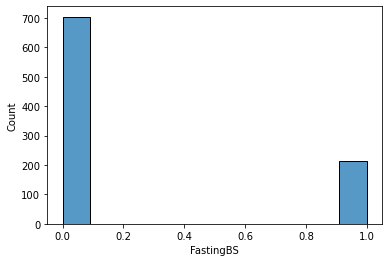

In [21]:
sns.histplot(data['FastingBS'])
plt.show()

The 51.2% person having the fasting blood sugar rate over 120 mg/dl and 55% person having the fasting blood sugar rate below 120 mg/dl is affected by heart disease.

#### AGE

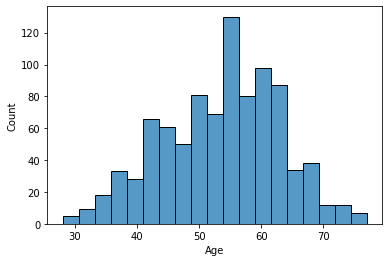

In [22]:
sns.histplot(data['Age'])
plt.show()

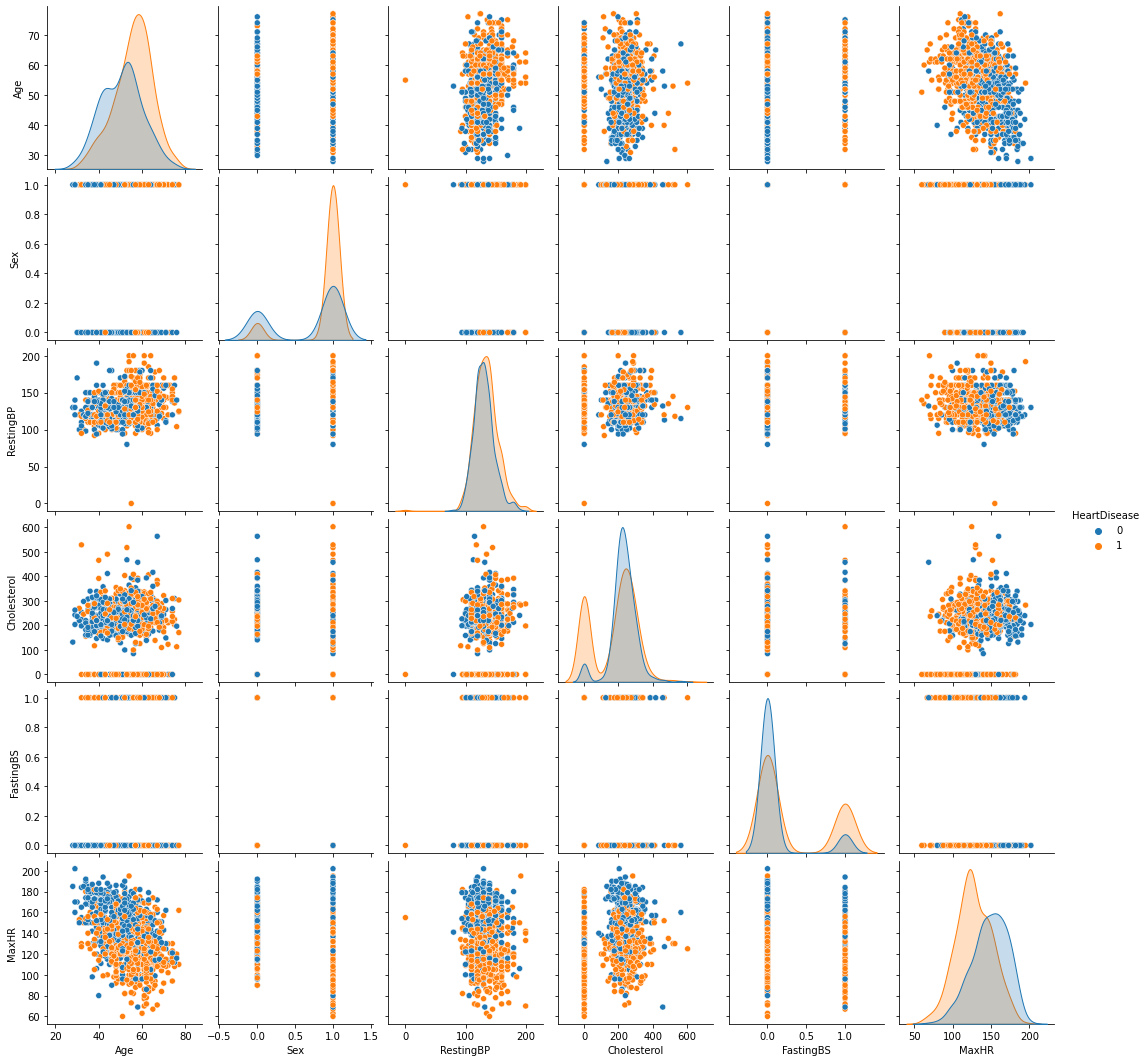

In [23]:
sns.pairplot(n_feat, hue='HeartDisease')

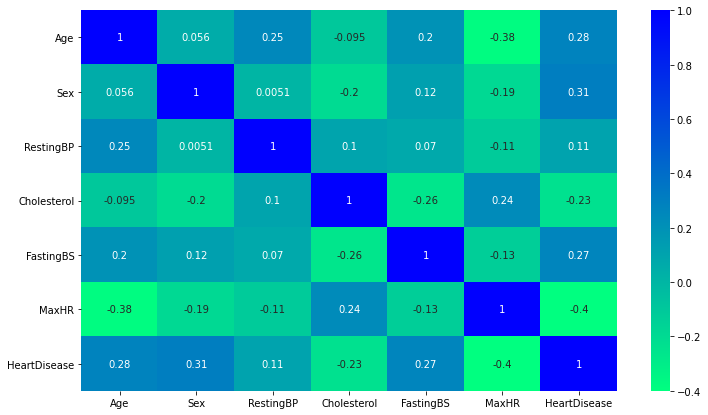

In [24]:
plt.figure(figsize=(12,7))
sns.heatmap(n_feat.corr(), annot=True, cmap='winter_r');

From this plot we identify that person having age between 40 to 65 year is more likely to affected by heart disease, therefor person having the age in this range have to more concisous about there health. 

## Symptoms

* Chest pain, chest tightness, chest pressure and chest discomfort (angina)
* Shortness of breath
* Pain, numbness, weakness or coldness in your legs or arms if the blood vessels in those parts of your body are narrowed
* Pain in the neck, jaw, throat, upper abdomen or back.
* Heart failure is also an outcome of heart disease, and breathlessness can occur when the heart becomes too weak to circulate blood.
* Some heart conditions occur with no symptoms at all, especially in older adults and individuals with diabetes.

In [25]:
data_train= data.iloc[1:750]
data_test = data.loc[750:]
display(data_train.head(3))
print()
display(data_test.head(3))

test_validation = data_test['HeartDisease']
test_extra = data_test.drop('HeartDisease', axis=1)

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1   49    0           NAP        160          180          0     Normal   
2   37    1           ATA        130          283          0         ST   
3   48    0           ASY        138          214          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
750   46    0           NAP        142          177          0        LVH   
751   67    0           NAP        152          277          0     Normal   
752   56    1           ASY        125          249          1        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
750    160              Y      1.4     Down             0  
751    172              N      0.0       Up             0  
752    144              Y      1.2     Flat             1

In [26]:
def encoder(data):
    z=pd.DataFrame()
    for i in cat_feat:
        data1=pd.get_dummies(data[i],drop_first=True)
        z=pd.concat([data1,z],axis=1)
    for j in n_feat:
        data1=data[j]
        z=pd.concat([data1,z],axis=1)
    return(z)
train = encoder(data_train)
train

HeartDisease  MaxHR  FastingBS  Cholesterol  RestingBP  Sex  Age  Flat  \
1               1    156          0          180        160    0   49     1   
2               0     98          0          283        130    1   37     0   
3               1    108          0          214        138    0   48     1   
4               0    122          0          195        150    1   54     0   
5               0    170          0          339        120    1   39     0   
..            ...    ...        ...          ...        ...  ...  ...   ...   
745             1    169          0          269        108    0   63     1   
746             1    132          0          212        112    1   66     0   
747             0    178          0          226        140    1   42     0   
748             1     96          0          246        120    1   64     0   
749             0    165          0          232        150    1   54     0   

     Up  Y  Normal  ST  ATA  NAP  TA  
1     0  0       1   0    0    1   0  
2     1  0       0   1    1    0   0  
3     0  1       1   0    0    0   0  
4     1  0       1   0    0    1   0  
5     1  0       1   0    0    1   0  
..   .. ..     ...  ..  ...  ...  ..  
745   0  1       1   0    0    0   0  
746   1  1       0   0    0    0   0  
747   1  0       1   0    0    0   0  
748   0  1       0   0    0    0   0  
749   1  0       0   0    0    1   0  

[749 rows x 15 columns]

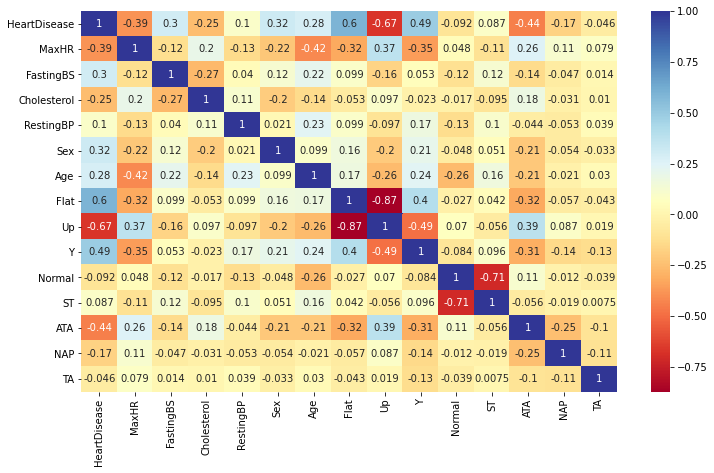

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(), annot=True, cmap='RdYlBu');

## Data Modeling

In [28]:
X = train.drop(['HeartDisease'], axis = 1)
y = train.HeartDisease.values

In [29]:
X

MaxHR  FastingBS  Cholesterol  RestingBP  Sex  Age  Flat  Up  Y  Normal  \
1      156          0          180        160    0   49     1   0  0       1   
2       98          0          283        130    1   37     0   1  0       0   
3      108          0          214        138    0   48     1   0  1       1   
4      122          0          195        150    1   54     0   1  0       1   
5      170          0          339        120    1   39     0   1  0       1   
..     ...        ...          ...        ...  ...  ...   ...  .. ..     ...   
745    169          0          269        108    0   63     1   0  1       1   
746    132          0          212        112    1   66     0   1  1       0   
747    178          0          226        140    1   42     0   1  0       1   
748     96          0          246        120    1   64     0   0  1       0   
749    165          0          232        150    1   54     0   1  0       0   

     ST  ATA  NAP  TA  
1     0    0    1   0  
2     1    1    0   0  
3     0    0    0   0  
4     0    0    1   0  
5     0    0    1   0  
..   ..  ...  ...  ..  
745   0    0    0   0  
746   0    0    0   0  
747   0    0    0   0  
748   0    0    0   0  
749   0    0    1   0  

[749 rows x 14 columns]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(x_train)
X_test=sc_X.transform(x_test)

In [32]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## Modeling

We have used a number of machine learning algorithms,these are 

## Logistic Regression
* Logistic regression
> The meaning of the term regression is very simple: any process that attempts to find relationships between variables is called regression. Logistic regression is regression because it finds relationships between variables. It is logistic because it uses logistic function as a link function.

In [73]:
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=100 * accuracy_score(y_test, lr_pred)

<AxesSubplot:title={'center':'LogisticRegression_cm'}>

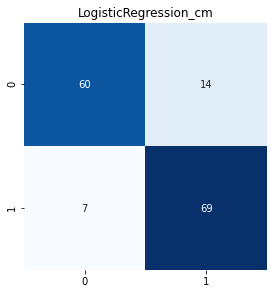

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

## Support Vector Classification
* Support vector machine (SVM)
> A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. So you're working on a text classification problem.

In [72]:
#SVM regressor
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
svc_cm=confusion_matrix(y_test,svc_pred)
svc_ac= 100 * accuracy_score(y_test, svc_pred)


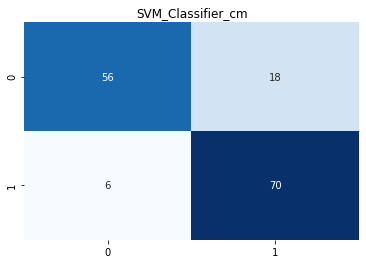

In [36]:
plt.title("SVM_Classifier_cm")
sns.heatmap(svc_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()
#sns.heatmap(bayes_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)

## Random Forest
* RandomForestClassifier
> Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees


In [71]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac= 100 * accuracy_score(rdf_pred,y_test)


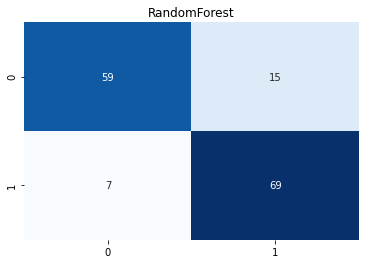

In [38]:
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## Decision Tree 
* DecisionTreeClassifier algorithms. 
> A decision tree classifier is a tree in which internal nodes are labeled by features. ... The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi.

In [70]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac= 100 * accuracy_score(dtree_pred,y_test)

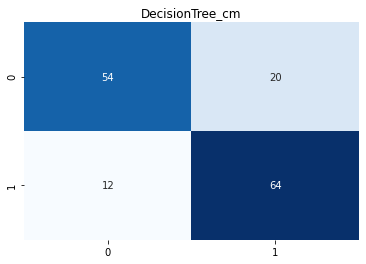

In [40]:
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## K-Nearest Neighbour
* K-nearest neighborhood (kNN)
> K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition

In [69]:
#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac= 100 * accuracy_score(knn_pred,y_test)

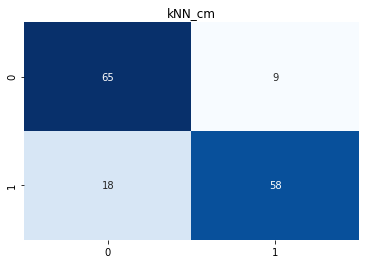

In [42]:
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## CatBoost Classifier
* CatBoost Classifier
> CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

In [68]:
#CatBoost
CatB=CatBoostClassifier(iterations=2000,learning_rate=0.001)
CatB.fit(X_train,y_train)
CatB_pred=knn.predict(X_test)
CatB_cm=confusion_matrix(y_test,CatB_pred)
CatB_ac= 100 * accuracy_score(CatB_pred,y_test)

0:	learn: 0.6922053	total: 5.62ms	remaining: 11.2s
1:	learn: 0.6912945	total: 8.78ms	remaining: 8.78s
2:	learn: 0.6903391	total: 11.6ms	remaining: 7.7s
3:	learn: 0.6894870	total: 14.8ms	remaining: 7.38s
4:	learn: 0.6886352	total: 18.2ms	remaining: 7.26s
5:	learn: 0.6877525	total: 22.9ms	remaining: 7.6s
6:	learn: 0.6868404	total: 26.1ms	remaining: 7.43s
7:	learn: 0.6858995	total: 29.1ms	remaining: 7.24s
8:	learn: 0.6849772	total: 32.3ms	remaining: 7.14s
9:	learn: 0.6840658	total: 35.1ms	remaining: 6.99s
10:	learn: 0.6833727	total: 37.2ms	remaining: 6.73s
11:	learn: 0.6827325	total: 38.7ms	remaining: 6.41s
12:	learn: 0.6817425	total: 41.6ms	remaining: 6.35s
13:	learn: 0.6808502	total: 44.3ms	remaining: 6.28s
14:	learn: 0.6798477	total: 47.6ms	remaining: 6.3s
15:	learn: 0.6790533	total: 51.2ms	remaining: 6.35s
16:	learn: 0.6782002	total: 54.1ms	remaining: 6.31s
17:	learn: 0.6772718	total: 57.2ms	remaining: 6.3s
18:	learn: 0.6763736	total: 60ms	remaining: 6.26s
19:	learn: 0.6754327	total: 

203:	learn: 0.5447121	total: 624ms	remaining: 5.5s
204:	learn: 0.5441412	total: 629ms	remaining: 5.5s
205:	learn: 0.5435377	total: 632ms	remaining: 5.51s
206:	learn: 0.5428738	total: 635ms	remaining: 5.5s
207:	learn: 0.5424340	total: 638ms	remaining: 5.5s
208:	learn: 0.5418405	total: 641ms	remaining: 5.5s
209:	learn: 0.5411649	total: 645ms	remaining: 5.5s
210:	learn: 0.5405895	total: 648ms	remaining: 5.49s
211:	learn: 0.5400191	total: 651ms	remaining: 5.49s
212:	learn: 0.5394833	total: 655ms	remaining: 5.49s
213:	learn: 0.5389035	total: 658ms	remaining: 5.49s
214:	learn: 0.5383266	total: 661ms	remaining: 5.48s
215:	learn: 0.5376674	total: 666ms	remaining: 5.5s
216:	learn: 0.5370252	total: 669ms	remaining: 5.49s
217:	learn: 0.5364119	total: 672ms	remaining: 5.5s
218:	learn: 0.5357867	total: 677ms	remaining: 5.5s
219:	learn: 0.5352512	total: 680ms	remaining: 5.5s
220:	learn: 0.5347111	total: 684ms	remaining: 5.51s
221:	learn: 0.5341471	total: 688ms	remaining: 5.51s
222:	learn: 0.5335574	

384:	learn: 0.4590094	total: 1.26s	remaining: 5.27s
385:	learn: 0.4585779	total: 1.26s	remaining: 5.27s
386:	learn: 0.4581124	total: 1.27s	remaining: 5.28s
387:	learn: 0.4577406	total: 1.27s	remaining: 5.28s
388:	learn: 0.4573875	total: 1.28s	remaining: 5.29s
389:	learn: 0.4569685	total: 1.28s	remaining: 5.3s
390:	learn: 0.4565799	total: 1.29s	remaining: 5.3s
391:	learn: 0.4562296	total: 1.3s	remaining: 5.32s
392:	learn: 0.4557911	total: 1.3s	remaining: 5.32s
393:	learn: 0.4553442	total: 1.31s	remaining: 5.33s
394:	learn: 0.4549648	total: 1.31s	remaining: 5.33s
395:	learn: 0.4545704	total: 1.31s	remaining: 5.33s
396:	learn: 0.4542696	total: 1.32s	remaining: 5.33s
397:	learn: 0.4537882	total: 1.32s	remaining: 5.33s
398:	learn: 0.4533984	total: 1.33s	remaining: 5.33s
399:	learn: 0.4531011	total: 1.33s	remaining: 5.34s
400:	learn: 0.4527003	total: 1.34s	remaining: 5.34s
401:	learn: 0.4522541	total: 1.35s	remaining: 5.35s
402:	learn: 0.4518835	total: 1.35s	remaining: 5.35s
403:	learn: 0.45

554:	learn: 0.4024960	total: 2.03s	remaining: 5.28s
555:	learn: 0.4022117	total: 2.03s	remaining: 5.28s
556:	learn: 0.4019320	total: 2.04s	remaining: 5.28s
557:	learn: 0.4016140	total: 2.04s	remaining: 5.28s
558:	learn: 0.4012872	total: 2.05s	remaining: 5.28s
559:	learn: 0.4010510	total: 2.05s	remaining: 5.27s
560:	learn: 0.4007023	total: 2.06s	remaining: 5.27s
561:	learn: 0.4004794	total: 2.06s	remaining: 5.27s
562:	learn: 0.4001354	total: 2.06s	remaining: 5.26s
563:	learn: 0.3999393	total: 2.06s	remaining: 5.26s
564:	learn: 0.3996673	total: 2.07s	remaining: 5.25s
565:	learn: 0.3993376	total: 2.07s	remaining: 5.25s
566:	learn: 0.3990266	total: 2.08s	remaining: 5.25s
567:	learn: 0.3987567	total: 2.08s	remaining: 5.25s
568:	learn: 0.3984954	total: 2.09s	remaining: 5.25s
569:	learn: 0.3981558	total: 2.09s	remaining: 5.25s
570:	learn: 0.3979062	total: 2.1s	remaining: 5.25s
571:	learn: 0.3976602	total: 2.1s	remaining: 5.25s
572:	learn: 0.3974763	total: 2.1s	remaining: 5.24s
573:	learn: 0.3

746:	learn: 0.3573414	total: 2.65s	remaining: 4.45s
747:	learn: 0.3571526	total: 2.66s	remaining: 4.45s
748:	learn: 0.3569187	total: 2.66s	remaining: 4.44s
749:	learn: 0.3567118	total: 2.66s	remaining: 4.44s
750:	learn: 0.3565311	total: 2.67s	remaining: 4.43s
751:	learn: 0.3563271	total: 2.67s	remaining: 4.43s
752:	learn: 0.3560728	total: 2.67s	remaining: 4.42s
753:	learn: 0.3558627	total: 2.67s	remaining: 4.42s
754:	learn: 0.3555929	total: 2.68s	remaining: 4.42s
755:	learn: 0.3553560	total: 2.68s	remaining: 4.41s
756:	learn: 0.3552009	total: 2.68s	remaining: 4.41s
757:	learn: 0.3549952	total: 2.69s	remaining: 4.4s
758:	learn: 0.3548532	total: 2.69s	remaining: 4.4s
759:	learn: 0.3546809	total: 2.69s	remaining: 4.39s
760:	learn: 0.3544905	total: 2.69s	remaining: 4.39s
761:	learn: 0.3543246	total: 2.7s	remaining: 4.38s
762:	learn: 0.3541809	total: 2.7s	remaining: 4.38s
763:	learn: 0.3540317	total: 2.7s	remaining: 4.38s
764:	learn: 0.3538438	total: 2.71s	remaining: 4.37s
765:	learn: 0.353

910:	learn: 0.3289921	total: 3.13s	remaining: 3.74s
911:	learn: 0.3288065	total: 3.13s	remaining: 3.74s
912:	learn: 0.3286514	total: 3.14s	remaining: 3.74s
913:	learn: 0.3285075	total: 3.14s	remaining: 3.73s
914:	learn: 0.3283280	total: 3.14s	remaining: 3.73s
915:	learn: 0.3281798	total: 3.15s	remaining: 3.72s
916:	learn: 0.3280036	total: 3.15s	remaining: 3.72s
917:	learn: 0.3278027	total: 3.15s	remaining: 3.72s
918:	learn: 0.3276314	total: 3.16s	remaining: 3.71s
919:	learn: 0.3274826	total: 3.16s	remaining: 3.71s
920:	learn: 0.3273451	total: 3.16s	remaining: 3.7s
921:	learn: 0.3271612	total: 3.17s	remaining: 3.7s
922:	learn: 0.3270114	total: 3.17s	remaining: 3.7s
923:	learn: 0.3268571	total: 3.17s	remaining: 3.69s
924:	learn: 0.3267201	total: 3.17s	remaining: 3.69s
925:	learn: 0.3265691	total: 3.18s	remaining: 3.69s
926:	learn: 0.3264532	total: 3.18s	remaining: 3.68s
927:	learn: 0.3263026	total: 3.18s	remaining: 3.68s
928:	learn: 0.3261219	total: 3.19s	remaining: 3.67s
929:	learn: 0.3

1072:	learn: 0.3076920	total: 3.6s	remaining: 3.11s
1073:	learn: 0.3075795	total: 3.61s	remaining: 3.11s
1074:	learn: 0.3074140	total: 3.61s	remaining: 3.11s
1075:	learn: 0.3072493	total: 3.61s	remaining: 3.1s
1076:	learn: 0.3071221	total: 3.62s	remaining: 3.1s
1077:	learn: 0.3070326	total: 3.62s	remaining: 3.1s
1078:	learn: 0.3069033	total: 3.62s	remaining: 3.09s
1079:	learn: 0.3067857	total: 3.63s	remaining: 3.09s
1080:	learn: 0.3066486	total: 3.63s	remaining: 3.08s
1081:	learn: 0.3065378	total: 3.63s	remaining: 3.08s
1082:	learn: 0.3064489	total: 3.63s	remaining: 3.08s
1083:	learn: 0.3064037	total: 3.63s	remaining: 3.07s
1084:	learn: 0.3063035	total: 3.64s	remaining: 3.07s
1085:	learn: 0.3061659	total: 3.64s	remaining: 3.06s
1086:	learn: 0.3060614	total: 3.64s	remaining: 3.06s
1087:	learn: 0.3059464	total: 3.65s	remaining: 3.06s
1088:	learn: 0.3058171	total: 3.65s	remaining: 3.05s
1089:	learn: 0.3057566	total: 3.65s	remaining: 3.05s
1090:	learn: 0.3056644	total: 3.65s	remaining: 3.0

1235:	learn: 0.2906803	total: 4.09s	remaining: 2.53s
1236:	learn: 0.2905977	total: 4.09s	remaining: 2.52s
1237:	learn: 0.2905432	total: 4.09s	remaining: 2.52s
1238:	learn: 0.2904173	total: 4.1s	remaining: 2.52s
1239:	learn: 0.2902944	total: 4.1s	remaining: 2.51s
1240:	learn: 0.2901571	total: 4.1s	remaining: 2.51s
1241:	learn: 0.2900329	total: 4.11s	remaining: 2.51s
1242:	learn: 0.2899407	total: 4.11s	remaining: 2.5s
1243:	learn: 0.2898578	total: 4.11s	remaining: 2.5s
1244:	learn: 0.2897642	total: 4.12s	remaining: 2.5s
1245:	learn: 0.2896539	total: 4.12s	remaining: 2.49s
1246:	learn: 0.2895785	total: 4.12s	remaining: 2.49s
1247:	learn: 0.2894718	total: 4.12s	remaining: 2.48s
1248:	learn: 0.2893717	total: 4.13s	remaining: 2.48s
1249:	learn: 0.2892565	total: 4.13s	remaining: 2.48s
1250:	learn: 0.2891844	total: 4.13s	remaining: 2.48s
1251:	learn: 0.2890570	total: 4.14s	remaining: 2.47s
1252:	learn: 0.2889924	total: 4.14s	remaining: 2.47s
1253:	learn: 0.2889124	total: 4.14s	remaining: 2.46s

1395:	learn: 0.2765428	total: 4.57s	remaining: 1.98s
1396:	learn: 0.2764501	total: 4.57s	remaining: 1.97s
1397:	learn: 0.2763883	total: 4.57s	remaining: 1.97s
1398:	learn: 0.2762841	total: 4.57s	remaining: 1.97s
1399:	learn: 0.2762290	total: 4.58s	remaining: 1.96s
1400:	learn: 0.2761384	total: 4.58s	remaining: 1.96s
1401:	learn: 0.2760344	total: 4.59s	remaining: 1.96s
1402:	learn: 0.2759895	total: 4.59s	remaining: 1.95s
1403:	learn: 0.2759094	total: 4.59s	remaining: 1.95s
1404:	learn: 0.2758078	total: 4.59s	remaining: 1.95s
1405:	learn: 0.2757471	total: 4.6s	remaining: 1.94s
1406:	learn: 0.2756470	total: 4.6s	remaining: 1.94s
1407:	learn: 0.2755672	total: 4.61s	remaining: 1.94s
1408:	learn: 0.2754538	total: 4.61s	remaining: 1.93s
1409:	learn: 0.2754181	total: 4.61s	remaining: 1.93s
1410:	learn: 0.2753189	total: 4.61s	remaining: 1.93s
1411:	learn: 0.2752050	total: 4.62s	remaining: 1.92s
1412:	learn: 0.2751224	total: 4.62s	remaining: 1.92s
1413:	learn: 0.2750789	total: 4.62s	remaining: 1

1565:	learn: 0.2645301	total: 5.04s	remaining: 1.4s
1566:	learn: 0.2644680	total: 5.05s	remaining: 1.39s
1567:	learn: 0.2644308	total: 5.05s	remaining: 1.39s
1568:	learn: 0.2643828	total: 5.05s	remaining: 1.39s
1569:	learn: 0.2643181	total: 5.06s	remaining: 1.38s
1570:	learn: 0.2642548	total: 5.06s	remaining: 1.38s
1571:	learn: 0.2641929	total: 5.06s	remaining: 1.38s
1572:	learn: 0.2641310	total: 5.06s	remaining: 1.37s
1573:	learn: 0.2640695	total: 5.07s	remaining: 1.37s
1574:	learn: 0.2639960	total: 5.07s	remaining: 1.37s
1575:	learn: 0.2639447	total: 5.07s	remaining: 1.36s
1576:	learn: 0.2638765	total: 5.08s	remaining: 1.36s
1577:	learn: 0.2638121	total: 5.08s	remaining: 1.36s
1578:	learn: 0.2637552	total: 5.08s	remaining: 1.35s
1579:	learn: 0.2636966	total: 5.08s	remaining: 1.35s
1580:	learn: 0.2636087	total: 5.09s	remaining: 1.35s
1581:	learn: 0.2635486	total: 5.09s	remaining: 1.34s
1582:	learn: 0.2634856	total: 5.09s	remaining: 1.34s
1583:	learn: 0.2634323	total: 5.1s	remaining: 1

1730:	learn: 0.2543741	total: 5.52s	remaining: 858ms
1731:	learn: 0.2543162	total: 5.52s	remaining: 855ms
1732:	learn: 0.2542529	total: 5.53s	remaining: 851ms
1733:	learn: 0.2541875	total: 5.53s	remaining: 848ms
1734:	learn: 0.2541483	total: 5.53s	remaining: 845ms
1735:	learn: 0.2541183	total: 5.53s	remaining: 842ms
1736:	learn: 0.2540783	total: 5.54s	remaining: 838ms
1737:	learn: 0.2540005	total: 5.54s	remaining: 835ms
1738:	learn: 0.2539212	total: 5.54s	remaining: 832ms
1739:	learn: 0.2538767	total: 5.54s	remaining: 829ms
1740:	learn: 0.2538061	total: 5.55s	remaining: 826ms
1741:	learn: 0.2537670	total: 5.55s	remaining: 822ms
1742:	learn: 0.2537237	total: 5.55s	remaining: 819ms
1743:	learn: 0.2536630	total: 5.56s	remaining: 816ms
1744:	learn: 0.2536113	total: 5.56s	remaining: 812ms
1745:	learn: 0.2535422	total: 5.56s	remaining: 809ms
1746:	learn: 0.2535171	total: 5.57s	remaining: 806ms
1747:	learn: 0.2534774	total: 5.57s	remaining: 803ms
1748:	learn: 0.2534393	total: 5.57s	remaining:

1895:	learn: 0.2457006	total: 6s	remaining: 329ms
1896:	learn: 0.2456729	total: 6s	remaining: 326ms
1897:	learn: 0.2456301	total: 6s	remaining: 323ms
1898:	learn: 0.2455619	total: 6.01s	remaining: 319ms
1899:	learn: 0.2455002	total: 6.01s	remaining: 316ms
1900:	learn: 0.2454427	total: 6.01s	remaining: 313ms
1901:	learn: 0.2453955	total: 6.02s	remaining: 310ms
1902:	learn: 0.2453549	total: 6.02s	remaining: 307ms
1903:	learn: 0.2453221	total: 6.02s	remaining: 304ms
1904:	learn: 0.2452514	total: 6.02s	remaining: 300ms
1905:	learn: 0.2451907	total: 6.03s	remaining: 297ms
1906:	learn: 0.2451639	total: 6.03s	remaining: 294ms
1907:	learn: 0.2451140	total: 6.03s	remaining: 291ms
1908:	learn: 0.2450623	total: 6.04s	remaining: 288ms
1909:	learn: 0.2450350	total: 6.04s	remaining: 285ms
1910:	learn: 0.2449704	total: 6.04s	remaining: 281ms
1911:	learn: 0.2449000	total: 6.04s	remaining: 278ms
1912:	learn: 0.2448813	total: 6.05s	remaining: 275ms
1913:	learn: 0.2448303	total: 6.05s	remaining: 272ms
19

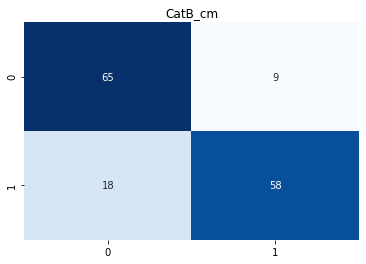

In [44]:
plt.title("CatB_cm")
sns.heatmap(CatB_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## XGBoost Classifier
* XGBoostingClassifier
> XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way

In [67]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
XGB_pred=knn.predict(X_test)
XGB_cm=confusion_matrix(y_test,XGB_pred)
XGB_ac=100 * accuracy_score(XGB_pred,y_test)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


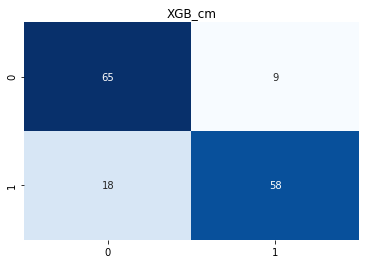

In [64]:
plt.title("XGB_cm")
sns.heatmap(XGB_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

## Model Accuracy and Performance

In [65]:
print('LogisticRegression_accuracy:\t',100 * lr_ac)
print('SVM_Classifier_accuracy:\t\t',100 * svc_ac)
print('RandomForest_accuracy:\t\t',100 * rdf_ac)
print('DecisionTree_accuracy:\t\t',100 * dtree_ac)
print('KNN_accuracy:\t\t\t',100 * knn_ac)
print('CatBoost_accuracy:\t\t',100 * CatB_ac)
print('XGB_accuracy:\t\t\t',100 * XGB_ac)

LogisticRegression_accuracy:	 86.0
SVM_Classifier_accuracy:		 84.0
RandomForest_accuracy:		 85.33333333333334
DecisionTree_accuracy:		 78.66666666666666
KNN_accuracy:			 82.0
CatBoost_accuracy:		 82.0
XGB_accuracy:			 82.0


Text(0.5, 1.0, 'Model Accracy')

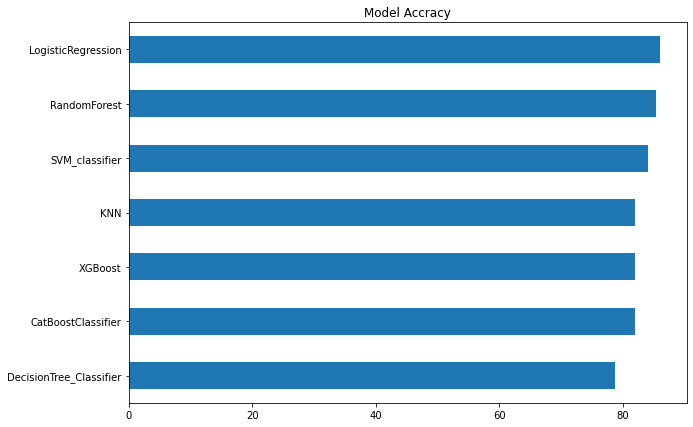

In [74]:
model_accuracy = pd.Series(data=[lr_ac,svc_ac,CatB_ac,XGB_ac,rdf_ac,dtree_ac,knn_ac], 
                index=['LogisticRegression','SVM_classifier','CatBoostClassifier','XGBoost',
                                      'RandomForest','DecisionTree_Classifier','KNN'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

## Preventions

* Quit smoking.
* Control other health conditions, such as high blood pressure, high cholesterol and diabetes.
* Exercise at least 30 minutes a day on most days of the week.
* Eat a diet that's low in salt and saturated fat.
* Maintain a healthy weight.
* Reduce and manage stress.
* Practice good hygiene.

### Summary
We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used Plotly, seaborn and matplotlib to do the visualizations. During the data preprocessing part, we converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training machine learning models, and applied cross validation on it. Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features. You could also do some ensemble learning.Lastly, we looked at it’s confusion matrix and computed the models precision.